In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Load the data into a DataFrame
data = pd.read_csv("customer_booking.csv", encoding='ISO-8859-1')
data.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [43]:
# Check the unique values and their counts for categorical columns
print("Sales Channel:", data['sales_channel'].value_counts())
print("Trip Type:", data['trip_type'].value_counts())
print("Flight Day:", data['flight_day'].value_counts())
print("Route (Top 5):", data['route'].value_counts().head())
print("Booking Origin (Top 5):", data['booking_origin'].value_counts().head())

# Display summary stats for numerical columns
data[['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']].describe()


Sales Channel: sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64
Trip Type: trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64
Flight Day: flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: count, dtype: int64
Route (Top 5): route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
Name: count, dtype: int64
Booking Origin (Top 5): booking_origin
Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
Name: count, dtype: int64


,purchase_lead,length_of_stay,flight_hour,flight_duration
count,50000.000000,50000.00000,50000.00000,50000.000000
mean,84.940480,23.04456,9.06634,7.277561
std,90.451378,33.88767,5.41266,1.496863
min,0.000000,0.00000,0.00000,4.670000
25%,21.000000,5.00000,5.00000,5.620000
50%,51.000000,17.00000,9.00000,7.570000
75%,115.000000,28.00000,13.00000,8.830000
max,867.000000,778.00000,23.00000,9.500000


Accuracy: 0.8541

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.53      0.13      0.21      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000



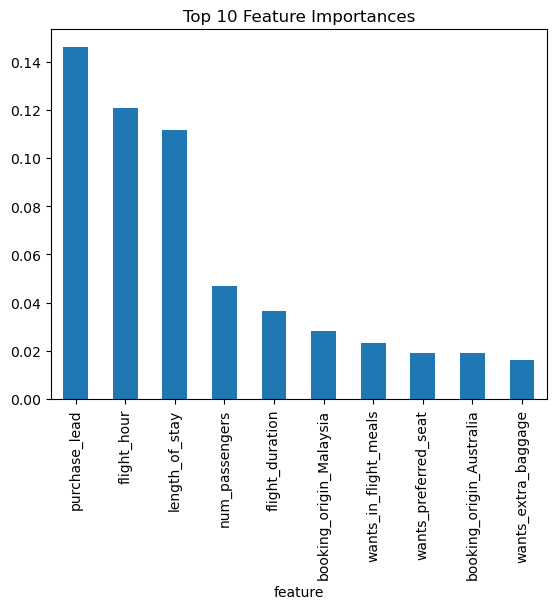

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])

# Separate features and target variable
X = data_encoded.drop('booking_complete', axis=1)  # Features
y = data_encoded['booking_complete']               # Target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and display the classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).head(10)

# Plot top 10 features
feature_importance_df.plot(kind='bar', x='feature', y='importance', legend=False)
plt.title('Top 10 Feature Importances')
plt.show()
